In [51]:
import numpy as np
import pandas as pd
df= pd.read_csv(r'C:\Users\dhill\Downloads\Python statistics by Duo Analyst\premier_league_final_data.csv')
df

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,1Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,2Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,3Birmingham City,266,73,111,82,273,66,1875,0.0,NaN,May-11
3,4Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,5Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12
5,6Bournemouth,219,64,107,48,269,45,1899,0.0,0,Apr-23
6,7Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,-,Apr-23
7,8Burnley,304,83,145,76,300,78,1882,0.0,-,Apr-22
8,9Charlton Athletic,304,93,129,82,342,91,1905,0.0,NaN,May-07
9,10Chelsea,1182,628,261,293,2002,473,1905,5.0,4,Apr-23


In [53]:
#Winners and Runner column (null values are treated based on domain knowledge i.e. default value as zero),
# last_played (formatted to ‘YYYY’)
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,1Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,2Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,3Birmingham City,266,73,111,82,273,66,1875,0.0,NaN,May-11
3,4Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,5Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12


In [21]:
df.shape

(40, 11)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            40 non-null     object 
 1   Matches Played  40 non-null     int64  
 2   Win             40 non-null     int64  
 3   Loss            40 non-null     int64  
 4   Drawn           40 non-null     int64  
 5   Goals           40 non-null     int64  
 6   Clean Sheets    40 non-null     int64  
 7   TeamLaunch      40 non-null     object 
 8   Winners         25 non-null     float64
 9   Runners-up      22 non-null     object 
 10  lastplayed_pl   40 non-null     object 
dtypes: float64(1), int64(6), object(4)
memory usage: 3.6+ KB


In [ ]:
# **Upon examining the dataset, we note that it consists data of 40 clubs,
#with the first column containing the club name and 
#the remaining 10 columns providing information on the club’s performance in the Premier League. 
#However, the data is not entirely clean.

# **We could see that the below columns need to be cleaned:**
# Club — It comprises **numeric values added to the start of the club names**
# Team Launch— Some of the data contains **month along with the year** and the datatype has to be **formatted to datetime**
# Winners — The data contains **null values** which should be removed
# Runners-up — The **datatype is object, it should be casted to numeric** along with removing the **null values**
# lastplayed_pl — Formatted to ‘YYYY’ format instead of ‘MM-YYYY’ as it would be easier to analyze in the former way

In [54]:
# Let's clean the data under Club column

df['Club'] = df['Club'].str.replace('\d+','',regex=True)
df.head()

#In this code, '\d+' is a regular expression pattern that matches 
#one or more digits at the start of the string. The str.replace() 
#method replaces this pattern with an empty string, effectively 
#removing the numbers from the front of each team name in the "Club" column.

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,Birmingham City,266,73,111,82,273,66,1875,0.0,NaN,May-11
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12


In [55]:
# Let's clean the data under TeamLaunch coloumn

# convert the column to datetime format

df['TeamLaunch'] = pd.to_datetime(df['TeamLaunch'],format= None,errors='coerce')

# convert the column to YYYY format

df['TeamLaunch'] = df['TeamLaunch'].dt.strftime('%Y')

# The first line of code converts the column 'column_name' to datetime 
# format using the pandas to_datetime() function. The 'format' paramter 
# is set to 'mixed', since the data doesn't contain consistent format. 
# (i.e. 16 Oct 1878, 1861, Aug 1883). 

# The 'errors' parameter is set to 'coerce', which means that any invalid 
# dates will be set to NaT (Not a Time) in the resulting datetime column.

# The second line of code uses the dt.strftime() method to convert the 
# datetime column to a string column with only the year values. '%Y' is the 
# format code for the year. This line of code will create a new column 
# 'column_name' in the format YYYY.
df

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,Birmingham City,266,73,111,82,273,66,1875,0.0,NaN,May-11
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12
5,Bournemouth,219,64,107,48,269,45,1899,0.0,0,Apr-23
6,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,-,Apr-23
7,Burnley,304,83,145,76,300,78,1882,0.0,-,Apr-22
8,Charlton Athletic,304,93,129,82,342,91,1905,0.0,NaN,May-07
9,Chelsea,1182,628,261,293,2002,473,1905,5.0,4,Apr-23


In [56]:
# Let's clean the Winnerrs and Runners-up column

df['Winners'].value_counts()
df['Runners-up'].value_counts()

0    10
1     3
-     3
6     1
4     1
5     1
3     1
7     1
2     1
Name: Runners-up, dtype: int64

In [ ]:

# Upon examining the dataset, it is evident that there are a total of 25 non-null values. 
# Notably, among the 18 football clubs listed, none have secured the Premier League title, 
# as indicated by a count of 0 in the "Winners" column for each club.

# Upon scrutinizing the counts, it has been established that there have been a total of 30 Premier League tournaments 
# conducted in the past (covering the years 1992–2022, with one tournament per year). 
# This calculation aligns with the information provided in the 'Winners' data.
# Among the 25 football clubs with non-zero and non-null entries in the 'Winners' column, 
# 3 clubs have claimed the Premier League title once, 1 club has triumphed thrice, 
# another has secured victory 5 times, a different club has achieved success 6 times, 
# and an exceptional club has clinched the title an impressive 13 times, summing up to 30 victories.

# This implies that all remaining clubs in the dataset have not emerged victorious in any Premier League matches. 
# Consequently, it is recommended to update the "Winners" column by replacing null values with 0 for these clubs, 
# reflecting their lack of Premier League titles. 
# This data cleaning procedure aims to ensure that the dataset accurately portrays the historical performance of each club 
# in terms of Premier League victories.

In [ ]:
# It's evident that the column in question contains both null values and '-' values. 
# After assessing the 'Winners' column, we determined that the Premier League tournament has occurred 30 times. 
# During these tournaments, one team finished as runner-up 7 times, another 6 times, 
# one team 5 times, another 4 times, another 3 times, one team 2 times, and three teams finished as runner-up once each.

# Therefore, the appropriate default value to fill in for null values is zero

In [57]:
# filling the null columns with zero
df['Winners'].fillna(0, inplace=True)

# .fillna(0, inplace=True) This is a method in pandas that is used to fill missing (null) values in a Series or DataFrame. 
# In this case, it is applied to the "Winners" column of the DataFrame df to fill any null values with the value 0.

In [58]:

# Check for null values in the "Winners" column after data cleaning
df["Winners"].isnull().any()

False

In [59]:

# .fillna(0, inplace=True) This is a method in pandas that is used to fill missing (null) values in a Series or DataFrame. 
# In this case, it is applied to the "Winners" column of the DataFrame df to fill any null values with the value 0.

df['Runners-up'].fillna(0,inplace=True)
df['Runners-up'].replace('-',0,inplace=True)
df

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,Birmingham City,266,73,111,82,273,66,1875,0.0,0,May-11
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12
5,Bournemouth,219,64,107,48,269,45,1899,0.0,0,Apr-23
6,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,Apr-23
7,Burnley,304,83,145,76,300,78,1882,0.0,0,Apr-22
8,Charlton Athletic,304,93,129,82,342,91,1905,0.0,0,May-07
9,Chelsea,1182,628,261,293,2002,473,1905,5.0,4,Apr-23


In [60]:

# Also we have seen it earlier that 'Runners-up' column is "Object" type let us convert it into int type
df['Runners-up'] = pd.to_numeric(df['Runners-up'], errors='coerce')
df['Runners-up'] = df['Runners-up'].astype('Int64')

# pd.to_numeric() function to attempt to convert the "Runners-up" column to a numeric data type. 
#The errors='coerce' argument tells the function to replace any values that cannot be converted to a number with NaN.

#The .astype() method to convert the "Runners-up" column to an "Int64" data type. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            40 non-null     object 
 1   Matches Played  40 non-null     int64  
 2   Win             40 non-null     int64  
 3   Loss            40 non-null     int64  
 4   Drawn           40 non-null     int64  
 5   Goals           40 non-null     int64  
 6   Clean Sheets    40 non-null     int64  
 7   TeamLaunch      40 non-null     object 
 8   Winners         40 non-null     float64
 9   Runners-up      40 non-null     Int64  
 10  lastplayed_pl   40 non-null     object 
dtypes: Int64(1), float64(1), int64(6), object(3)
memory usage: 3.6+ KB


In [46]:
df

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Arsenal,1182,642,252,288,2089,448,1886,3.0,6,Apr-23
1,Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,Apr-23
2,Birmingham City,266,73,111,82,273,66,1875,0.0,0,May-11
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,May-12
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,May-12
5,Bournemouth,219,64,107,48,269,45,1899,0.0,0,Apr-23
6,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,Apr-23
7,Burnley,304,83,145,76,300,78,1882,0.0,0,Apr-22
8,Charlton Athletic,304,93,129,82,342,91,1905,0.0,0,May-07
9,Chelsea,1182,628,261,293,2002,473,1905,5.0,4,Apr-23


In [61]:
# The null values in every column has been corrected and cleaned.  

# One more column **lastplayed_pl needs to formatted to ‘YYYY’ format instead of ‘MM-YYYY’** as it would be easier to analyze in the former way.

# Let us extract only the year in lastplayed_pl column

#df['lastplayed_pl'] = pd.to_datetime(df['lastplayed_pl'], format='%b-%y',errors='coerce')


# Let us extract only the year in lastplayed_pl column

#df['lastplayed_pl'] = df['lastplayed_pl'].dt.strftime('%Y')


df['lastplayed_pl'] = (pd.to_datetime(df['lastplayed_pl'], format='%b-%y', errors='coerce')).dt.year

#The "format" parameter specifies the expected format of the input string. In this case '%b-%y' which indicates a three-letter month abbreviation followed by a two-digit year (e.g. "Mar-21"). 

df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Arsenal,1182,642,252,288,2089,448,1886,3.0,6,2023
1,Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,2023
2,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012


In [62]:
# DESCRIPTIVE ANALYSIS
df.describe()

,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,Winners,Runners-up,lastplayed_pl
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,573.750000,215.450000,210.425000,147.875000,769.000000,167.925000,0.750000,0.750000,2018.000000
std,358.986519,194.164608,102.132364,88.873632,627.746478,135.561584,2.372384,1.750458,6.876195
min,190.000000,41.000000,85.000000,48.000000,181.000000,45.000000,0.000000,0.000000,2000.000000
25%,275.000000,80.500000,127.500000,71.500000,304.500000,66.000000,0.000000,0.000000,2014.500000
50%,443.000000,116.500000,193.500000,120.000000,462.000000,104.000000,0.000000,0.000000,2022.000000
75%,934.750000,295.750000,263.000000,222.000000,1142.750000,244.250000,0.000000,0.000000,2023.000000
max,1182.000000,720.000000,429.000000,329.000000,2229.000000,491.000000,13.000000,7.000000,2023.000000


In [63]:
# Upon examining the 'Goals' column, we observe that the mean is 769, while the median is lower at 464. 
# The fact that the mean is greater than the median indicates a positive skewness,signifying that some teams have scored significantly more goals than others, with the highest being 2229.

# This pattern of positive skewness is also evident in the 'Matches Played,' 'Win,' 'Loss,' and 'Drawn' columns.

# Notably, in the 'Wins' and 'Runners-up' columns, quartile 1, quartile 2 (median), and quartile 3 are all 0, suggesting that a majority of teams have not secured victories or finished as runners-up in the tournament. 
# However, it is noteworthy that there is one team with a remarkable 13 tournament victories and another team that has been the runners-up 7 times.

# Now, let's identify which teams these exceptional records belong to.

df.describe()

# Team that has won Premier League 13 times
df[df['Winners']==13]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
20,Manchester United,1181,720,199,262,2229,491,1878,13.0,7,2023


In [64]:
# Team that has been runner-up 7 times
df[df['Runners-up']==7]['Club']

20    Manchester United
Name: Club, dtype: object

In [ ]:
#The club is Manchester United. It has won Premier league 13 times and have been runner-up 7 times.

Text(0.5, 1.0, 'Histogram of Matches Played')

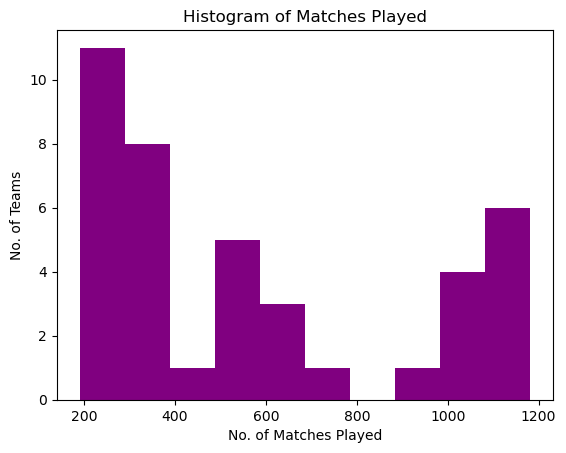

In [65]:
#EXPLORATORY DATA ANALYSIS 

import matplotlib.pyplot as plt

%matplotlib inline
# Let us visualize each column

# First let us start with Matches Played column
# plot histogram
plt.hist(df['Matches Played'],color='purple')

# Add labels and title
plt.xlabel('No. of Matches Played')
plt.ylabel('No. of Teams')
plt.title('Histogram of Matches Played')

In [ ]:
# The histogram reveals that most teams have participated in fewer than 400 matches. 
# Nonetheless, a handful of teams stand out for playing an unusually high number of matches, surpassing 900.

# Considering the project specifications, it's essential to highlight that certain well-established clubs have already 
# been acquired by competitors. Consequently, the client is keen on pinpointing clubs with potential future success, 
# even if they have limited experience in the Premier League.


In [67]:
# Identify teams who have played more than 900 matches
df[df['Matches Played']>900]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Arsenal,1182,642,252,288,2089,448,1886,3.0,6,2023
1,Aston Villa,1062,368,399,295,1306,311,1874,0.0,1,2023
9,Chelsea,1182,628,261,293,2002,473,1905,5.0,4,2023
13,Everton,1182,424,429,329,1515,357,1878,0.0,0,2023
18,Liverpool,1182,621,270,291,2071,453,1892,1.0,5,2023
19,Manchester City,991,494,283,214,1733,344,1894,6.0,3,2023
20,Manchester United,1181,720,199,262,2229,491,1878,13.0,7,2023
22,Newcastle United,1063,397,391,275,1426,280,1892,0.0,2,2023
29,Southampton,916,280,390,246,1103,237,1885,0.0,0,2023
33,Tottenham Hotspur,1182,518,378,286,1800,339,1882,0.0,1,2023


In [68]:
df[df['Matches Played']>900]['Club']

0               Arsenal
1           Aston Villa
9               Chelsea
13              Everton
18            Liverpool
19      Manchester City
20    Manchester United
22     Newcastle United
29          Southampton
33    Tottenham Hotspur
36      West Ham United
Name: Club, dtype: object

In [ ]:
# Upon examination, we've noted the presence of 11 clubs that boast significantly more experience in the Premier League compared to their counterparts. These clubs have accumulated a higher number of matches, establishing themselves as seasoned participants in the league.

# In accordance with the client's specifications, our interest lies in pinpointing potential clubs that might excel in the future, even if they have limited experience in the Premier League. Consequently, we've opted to exclude these 11 clubs from our analysis. Their well-established standing in the league could potentially skew our results, making it challenging to identify less experienced clubs with promising potential.

# This exclusion allows us to concentrate our analysis on the remaining clubs, potentially uncovering hidden gems that may have been overlooked due to their relative inexperience in the league.

In [69]:
df[df['Matches Played'] < 900]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
2,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012
5,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023
6,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023
7,Burnley,304,83,145,76,300,78,1882,0.0,0,2022
8,Charlton Athletic,304,93,129,82,342,91,1905,0.0,0,2007
10,Coventry City,354,99,143,112,387,92,1883,0.0,0,2001
11,Crystal Palace,532,153,241,138,576,133,1861,0.0,0,2023
12,Derby County,266,68,128,70,271,66,1884,0.0,0,2008


In [70]:
df = df[df['Matches Played'] < 900].reset_index(drop=True)
df

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023
5,Burnley,304,83,145,76,300,78,1882,0.0,0,2022
6,Charlton Athletic,304,93,129,82,342,91,1905,0.0,0,2007
7,Coventry City,354,99,143,112,387,92,1883,0.0,0,2001
8,Crystal Palace,532,153,241,138,576,133,1861,0.0,0,2023
9,Derby County,266,68,128,70,271,66,1884,0.0,0,2008


In [71]:
# Shape of data

df.shape

(29, 11)

In [ ]:
# Now let us look at Win, Loss, Drawn, and clean sheets column
# It is essential to understand that the values in all the columns represent the cumulative scores over all the matches played. 

# To accurately analyze the performance of the teams, we must normalize the data by dividing the no. of wins, loss, drawn, clean sheet, goals by the number of matches played. 

# This normalization will provide us with a fair idea of the winning, losing, draw, and clean sheet percentages of each team along with goals per match.

In [72]:
# Create new columns for Winning Rate, Loss Rate, Draw Rate, & Clean Sheet Rate
df['Winning Rate'] = (df['Win'] / df['Matches Played'])*100
df['Loss Rate'] = (df['Loss'] / df['Matches Played'])*100
df['Drawn Rate'] = (df['Drawn'] / df['Matches Played'])*100
df['Clean Sheet Rate'] = (df['Clean Sheets'] / df['Matches Played'])*100

In [74]:
# Create a column for average goals scored per match

df['Avg Goals Per Match']=df['Goals']/df['Matches Played']

df['Avg Goals Per Match']=df['Avg Goals Per Match'].round()

In [75]:
# View data
df.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,lastplayed_pl,Winning Rate,Loss Rate,Drawn Rate,Clean Sheet Rate,Avg Goals Per Match
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,2011,27.443609,41.729323,30.827068,24.812030,1.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,2012,37.643678,35.919540,26.436782,30.172414,1.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,2012,30.161943,43.927126,25.910931,21.862348,1.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,2023,29.223744,48.858447,21.917808,20.547945,1.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,2023,27.981651,38.990826,33.027523,26.605505,1.0


In [ ]:
# Our new columns are succesfully added in the dataframe
